In [ ]:
Project 1

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
project1= pd.read_csv("project1.csv")

In [3]:
project1.head()

,Airlines,Time,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,On time,497,221,212,503,"1,841"
1,ALASKA,delayed,67,12,20,102,305
2,AM WEST,On time,694,"4,840",383,320,201
3,AM WEST,delayed,117,415,65,129,61


In [5]:
# df_delayed contains number of flights that are delayed of each airline for respective cities in the columns 
df_delayed = project1[project1['Time'] == 'delayed']

In [6]:
df_delayed.head()

,Airlines,Time,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
1,ALASKA,delayed,67,12,20,102,305
3,AM WEST,delayed,117,415,65,129,61


In [7]:
# Previously Phoenix and Seattle values were stored as Object because of ',' in the values. So we need to convert 
# the values to integer format and store them into their respective columns
df_delayed['Phoenix'] = df_delayed.Phoenix.astype(int)
df_delayed['Seattle'] = df_delayed.Seattle.astype(int)

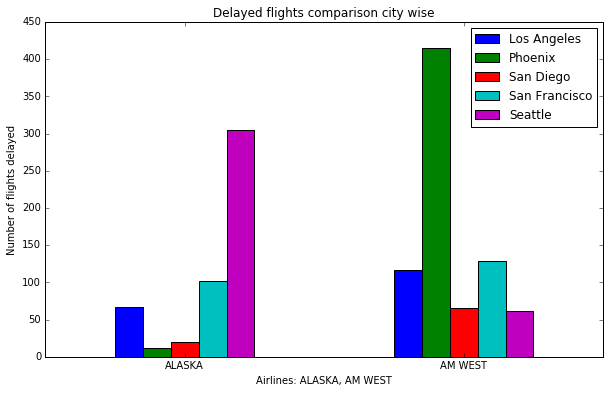

In [8]:
# labels has the list of airlines (here ALASKA and AM WEST)
# set_xticklabels to set the name as its respective airline name for each bar plot group 
labels = list(df_delayed.Airlines.unique())
barplot = df_delayed.plot(kind='bar', title='Delayed flights comparison city wise', figsize=(10,6), rot=0)
barplot.set_xlabel('Airlines: ' + ', '.join(labels))
barplot.set_ylabel('Number of flights delayed')
barplot.set_xticklabels(df_delayed.Airlines);

In [9]:
# Total number of flights delayed for each airline( summation of all cities)
t = df_delayed.sum(axis=1)

In [10]:
# Created a dataframe containing the airline name and total number of flights delayed
df_sum_delayed_flights = pd.DataFrame([{'Airlines': labels[0], 'delayed_total': t[1]},
                                       {'Airlines': labels[1], 'delayed_total': t[3]}])

In [11]:
df_sum_delayed_flights.head()

,Airlines,delayed_total
0,ALASKA,506
1,AM WEST,787


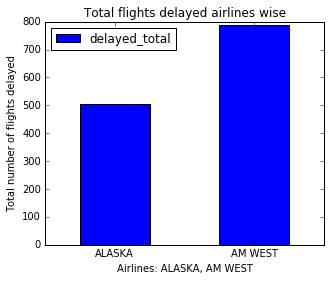

In [12]:
barplot = df_sum_delayed_flights.plot(kind='bar', title='Total flights delayed airlines wise', 
                                      figsize=(5,4), rot=0)
barplot.set_xlabel('Airlines: ' + ', '.join(labels))
barplot.set_ylabel('Total number of flights delayed')
barplot.set_xticklabels(df_sum_delayed_flights.Airlines);

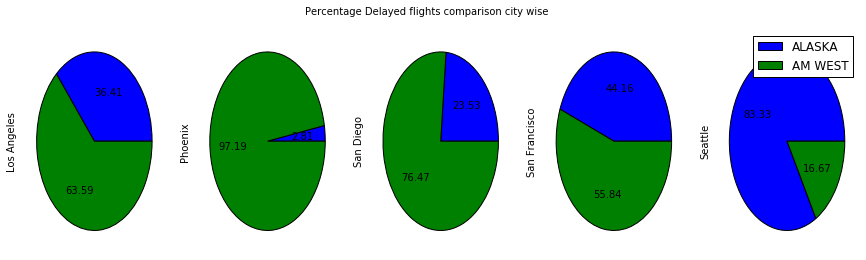

In [13]:
pieplot = df_delayed.plot(kind='pie', title='Percentage Delayed flights comparison city wise', figsize=(15,4), 
                          rot=0, subplots=True, labels=['', ''], legend=True, autopct="%.2f")
plt.legend(labels=labels, loc="best");